
### EXP1- Language SPM maps

#### *Preprocessing:*
- Niak preprocessed LANGUAGE task (new scrub method)

#### *Connectome SPM-Maps:*

```
   Math 
   Story
  
```

In [56]:
from nilearn import plotting
import os
import numpy as np
import nibabel as nib
import scipy.io as sio
import nibabel as nib

In [11]:
%matplotlib inline

In [12]:
# Set path
path_root = "/home/yassinebha/Drive/HCP/"
path_rmaps = os.path.join(path_root,"subtypes_scores/26-10-2016/hcp_language_activation_maps_24-Jan-2017/spm_maps/mean_maps_nii/")
rmaps_file_pattern = "{}.nii.gz"

In [13]:
# get networks names
trial_names = [f[:-7] for f in os.listdir(path_rmaps)]
trial_names

['story', 'math']

In [38]:
print("(%s, %s, %s) is the shape of for trial " %  in_vol.shape, trial)

(53, 64, 52) is the shape of for trial  math


(53, 64, 52) is the shape of for trial:  story
Min = -34.024; Max = 36.183
(53, 64, 52) is the shape of for trial:  math
Min = -36.205; Max = 32.768


/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


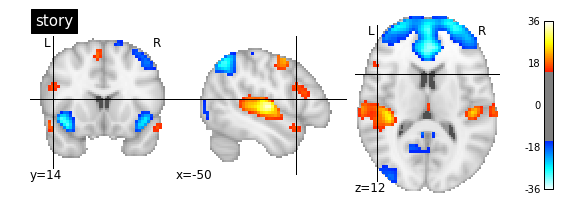

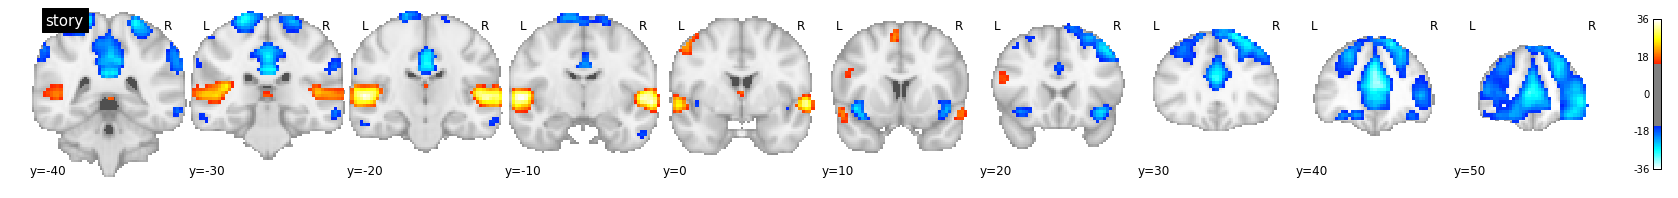

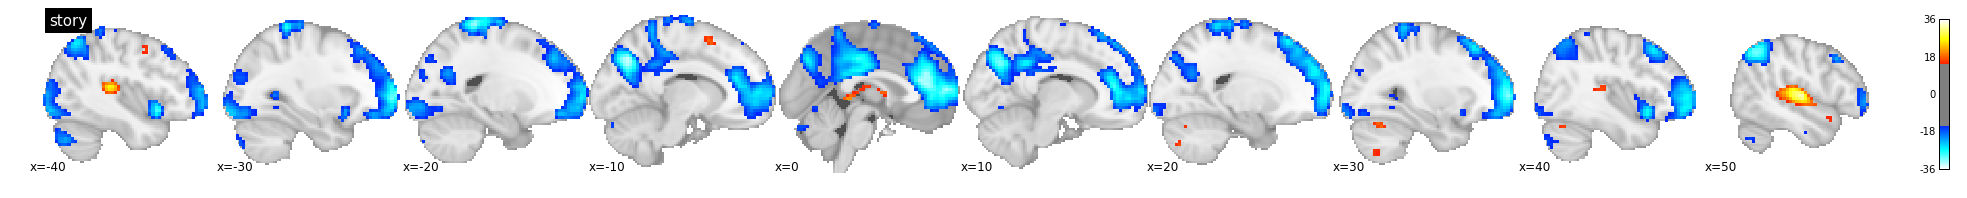

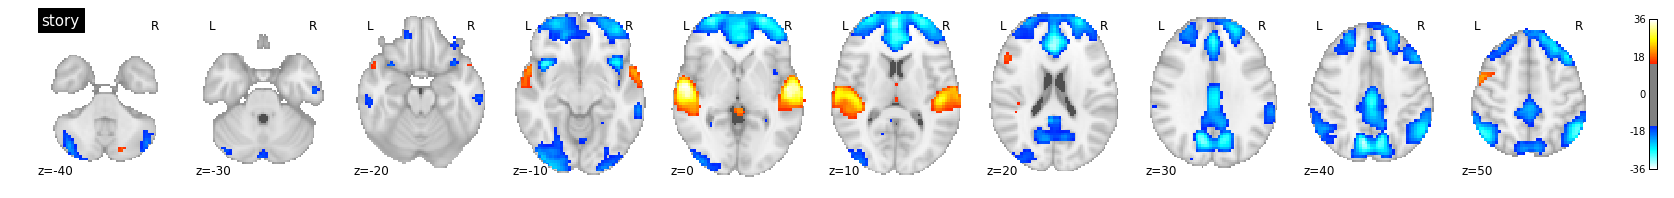

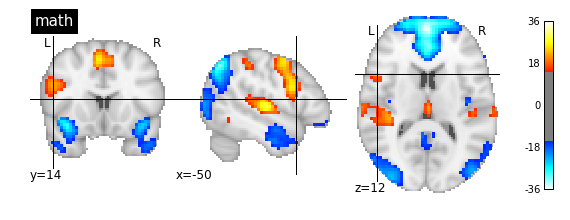

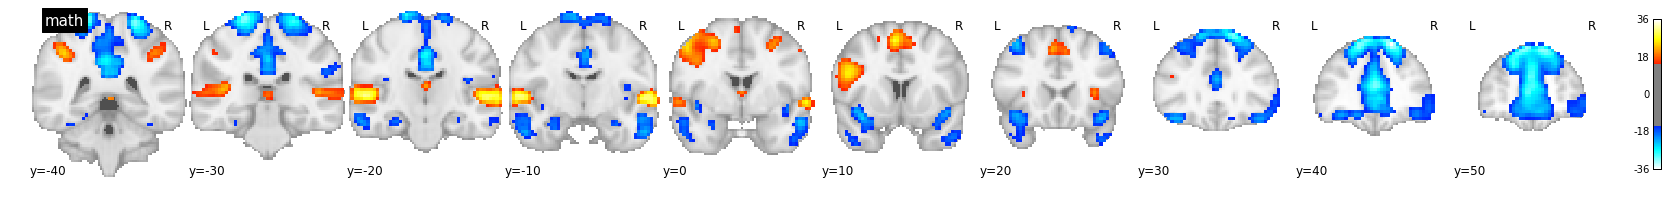

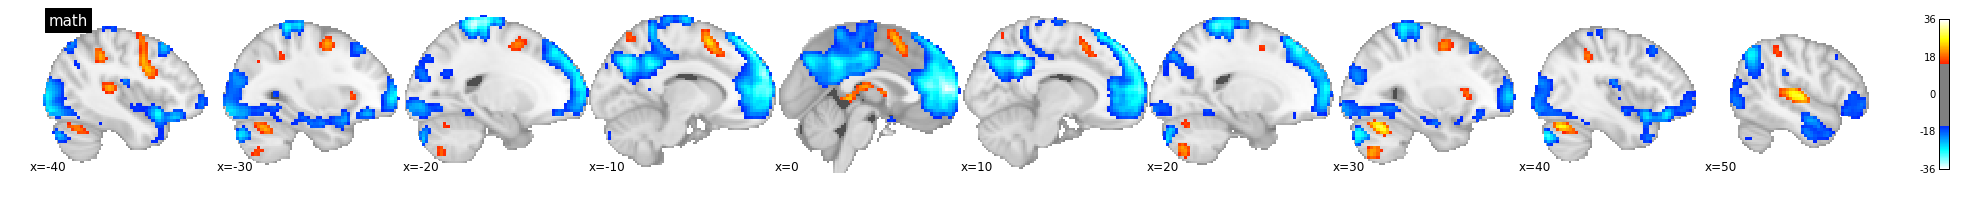

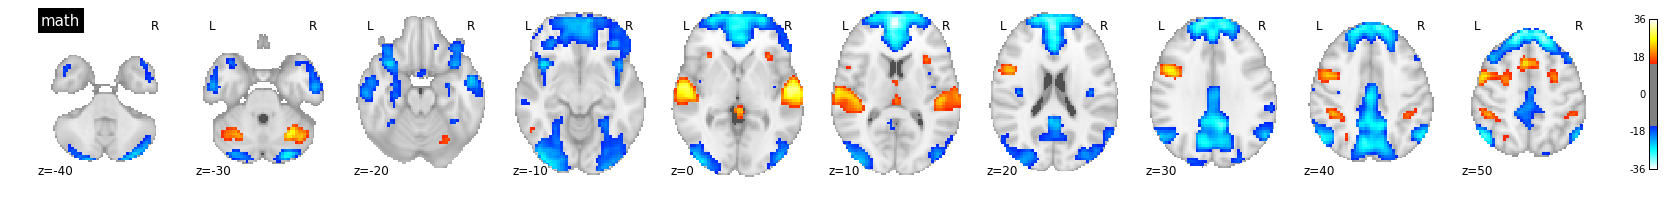

In [52]:
for index, trial in enumerate(trial_names):
    trial_file = os.path.join(path_rmaps, rmaps_file_pattern.format(trial))
    in_vol=nib.load(trial_file)
    
    print("(%s, %s, %s) is the shape of for trial: " %  in_vol.shape, trial)
    print("Min = %.3f; Max = %.3f" % (in_vol.get_data().min(), in_vol.get_data().max()))
    
    
    # Plot volume
    display = plotting.plot_stat_map(in_vol, threshold= 15,
                                     cut_coords=(-50, 14, 12),
                                     title= trial
                                    )
    #print ("SPM map for {} trial".format(trial))
    display = plotting.plot_stat_map(in_vol, threshold= 15,
                                     display_mode='y',
                                     cut_coords= range(-40, 60, 10),
                                     title= trial
                                    )
    display = plotting.plot_stat_map(in_vol, threshold=15,
                                     display_mode='x',
                                     cut_coords= range(-40, 60, 10),
                                     title= trial
                                    )
    display = plotting.plot_stat_map(in_vol, threshold=15,
                                     display_mode='z',
                                     cut_coords= range(-40, 60, 10),
                                     title= trial
                                    )

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


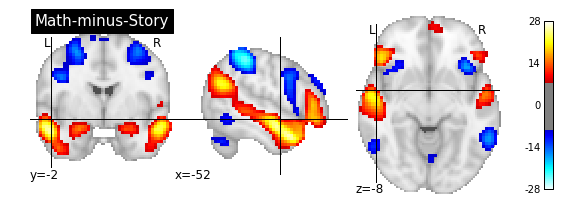

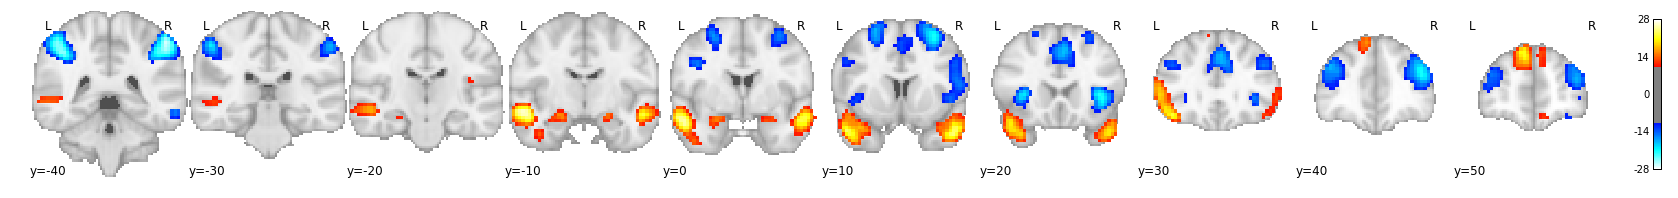

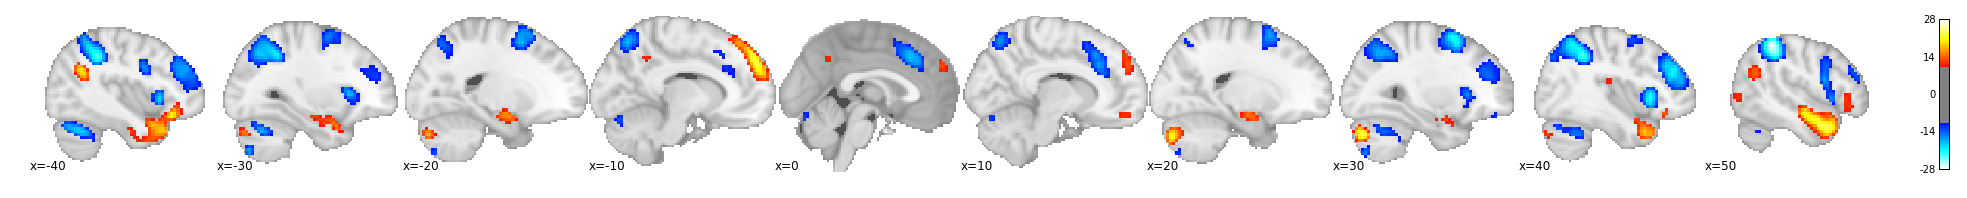

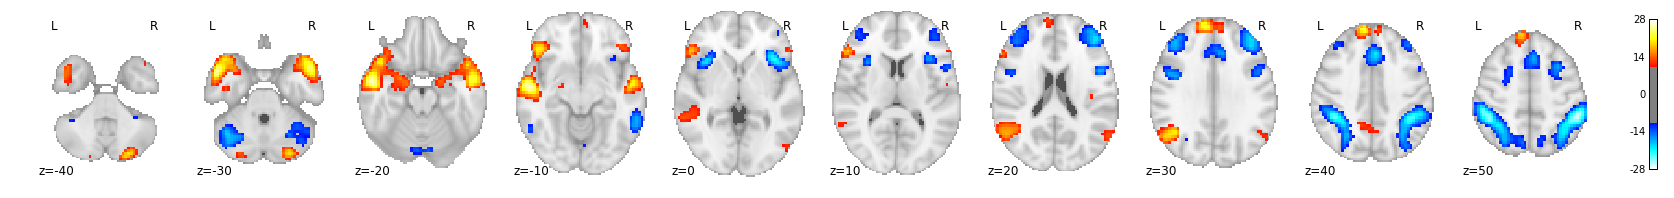

In [70]:
# display map difference Math - Story

in_vol_math = nib.load(os.path.join(path_rmaps, rmaps_file_pattern.format("math")))
in_vol_story = nib.load(os.path.join(path_rmaps, rmaps_file_pattern.format("story")))
in_story_minus_math = in_vol_story.get_data() - in_vol_math.get_data()
in_vol_story_minus_math = nib.Nifti1Image(in_story_minus_math, 
                                          affine=in_vol_story.affine, 
                                          header=in_vol_story.header
                                         )

display = plotting.plot_stat_map(in_vol_story_minus_math, threshold= 8,
                                 cut_coords=(-52, -2, -8),
                                 title= "Math-minus-Story"
                                 )
display = plotting.plot_stat_map(in_vol_story_minus_math, threshold= 11,
                                 display_mode='y',
                                 cut_coords= range(-40, 60, 10),
                                )
display = plotting.plot_stat_map(in_vol_story_minus_math, threshold=11,
                                 display_mode='x',
                                 cut_coords= range(-40, 60, 10),
                                )
display = plotting.plot_stat_map(in_vol_story_minus_math, threshold=11,
                                 display_mode='z',
                                 cut_coords= range(-40, 60, 10),
                                )